In [ ]:
#Importing Values
import pandas as pd
import numpy as np
import pyc3dserver as c3d

itf = c3d.c3dserver()

ret = c3d.open_c3d(itf, 'S1_DP_04_M.c3d')

dict_header = c3d.get_dict_header(itf)

dict_groups = c3d.get_dict_groups(itf)

dict_markers = c3d.get_dict_markers(itf)
#print(dict_markers)

print(dict_markers.keys())
print(dict_markers['DATA'].keys())

#print(dict_markers['DATA']['POS'])
a = dict_markers['DATA']['POS']
print(a.keys())
print(a['LFHD'][0])

xList = []
yList = []
zList = []

for key, val in a.items():
    if key == 'RTHI2':
        for datapoint in val:
            xList.append(datapoint[0])
            yList.append(datapoint[1])
            zList.append(datapoint[2])

print((xList[0]))

ret = c3d.close_c3d(itf)    

Number of columns : 186
   Foot Strike  Event  Foot Off
1         0.64  1.635      2.03
The file is 683 frames long
The trial is 3.415 seconds
__________________________________________________


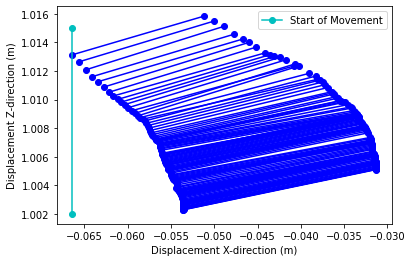

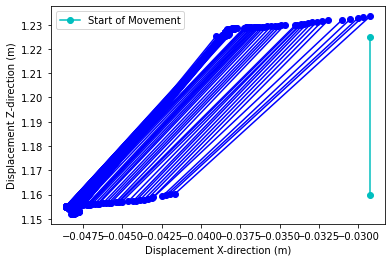

In [2]:

# Importing in needed modules to run functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Defining functions used to analyze data
def graphSegment(dataset, colX1, colZ1, colX2, colZ2, startRange, endRange):
    # * The function plots the segment between two markers to visualize the segment's movement over time. 
    # * Due to the amount of data points, the function is created so you can splice the dataset to visualize
    # * the moments that you want to. The function is designed so that it only plots the segments that don't cross over
    # * the x-distance for the first point, that way the segments are easier to track over time. This function can work
    # * for any of the planes, it all depends on the columns that is inputted. The function takes in 7 inputs and returns
    # * a figure. Starting with dataset, the columnsare based off the inputted data and the data is expected to be a 
    # * dataframe created using pandas. The type of data contained within the dataframe should be either int or float. 
    # * colX1, colZ1 are the two columns that contain the X and Z direction data for the first desired marker 
    # * (i.e 'RSK1' for X 'RSK1.2 for Z) and colX2, colZ2 are the two columns that contain the X and Z direction data for
    # * the second desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. startRange should be where you want to begin mapping the segment and
    # * endRange should be where you want to stop mapping the segment. Both startRange and endRange should be inputted
    # * as integers. The output is a figure containing the segments over time and the plot should be saved to a
    # * variable when calling the function. 


    # Creating the figure and axes that is going to be plotted on. Initializing necessary variables

    skipLine = 0
    fig, ax = plt.subplots()
    ax.set_xlabel('Displacement X-direction (m)')
    ax.set_ylabel('Displacement Z-direction (m)')

    # Manually cleaning up the imported columns by dropping the NaN values from the entire column
    dataset[colX1] = dataset[colX1].dropna()
    dataset[colZ1] = dataset[colZ1].dropna()
    dataset[colX2] = dataset[colX2].dropna()
    dataset[colZ2] = dataset[colZ2].dropna()
    #print(len(dataset[colX1]))
    
    # print(len(dataset[colX2]))
    
    # Looping through the desired portion of the segment's motion and plotting the line through each 
    # iteration of the loop. 
    for i in range(startRange,endRange):
        #Initializing the points in x-direction that are going to be checked and setting a pass condition
        if colX1 == 'Ball' or colZ1 == 'Ball.2':
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')

        else:
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')


            # ! Plotting the lines for each graph depending on the ranges imported into the function
            # ! Check the first condition, tyring to do Ball breaks it because the values start at 0
            if i == footStrike and startRange < footStrike and endRange <= followThrough :
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[0:footStrike][colZ1].dropna()), 3), round(max(dataset[0:footStrike][colZ2].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'co', linestyle = '-', label = 'Start of Movement')
                skipLine = 1

            if i == footStrike and skipLine != 1 and endRange > footStrike:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'go', linestyle = '-', label = 'Start of Movement')
            
        
            elif i == ballRelease:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ro', linestyle = '-', label = 'Ball Release')
            
        
            elif i == followThrough:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ko', linestyle = '-', label = 'Follow Through')
        
    ax.legend()

            
    # Returning the figure
    return fig


# Reading in the file and finding the amount of columns it has
columnCheck = pd.read_csv(
    r'C:\Users\Isiah Turner\OneDrive\Documents\Final Project 2022\S1_DP_04_M.csv',
    sep='\\t', skiprows= [0, 2, 3, 4], engine = 'python')

# Setting the max number of columns as a variable
maxCols = len(columnCheck.columns)

# Printing out the number of columns that is in the file
print('Number of columns :', maxCols)

# Reading in the data as a pandas dataframe for a csv file, columns used adjusts 
# for each file
data = pd.read_csv(
    r'C:\Users\Isiah Turner\OneDrive\Documents\Final Project 2022\S1_DP_04_M.csv',
    sep='\\t', usecols= np.r_[4:maxCols], skiprows= [0, 2, 3, 4], engine = 'python')

# Specifically reading in the events that were specified by the researchers
eventData = pd.read_csv(
    r'C:\Users\Isiah Turner\OneDrive\Documents\Final Project 2022\S1_DP_04_M.csv',
    sep='\\t', usecols= np.r_[0:3], skiprows= [0, 2, 3, 4], engine = 'python')

# Manually cleaning up the ball columns pandas series because it contains mostly NaN values.
# Making the NaN's zero to still be able to plot the values the same length as the
# other pandas series.

#data['Ball'] = data['Ball'].fillna(0)
#data['Ball.1'] = data['Ball.1'].fillna(0)
#data['Ball.2'] = data['Ball.2'].fillna(0)

#data = data.dropna()

# Isolating the event data and visualizing the times that the events occur
eventData = eventData.dropna()
print(eventData)

# Initializing and converting the event times to a frame to be used within the function
footStrike  = int((eventData.iloc[0]['Foot Strike']) * 200)
ballRelease = int((eventData.iloc[0]['Event']) * 200)
followThrough = int((eventData.iloc[0]['Foot Off']) * 200)

# Creating a pandas series to find the number of rows. This lets me find the total frame length
# and the total time of the trial
df = data.iloc[:]['RBHD'].dropna()
maxFrameLength = len(df)
trialLength = maxFrameLength / 200

# Visualizing/Communicating the total frame length and the trial times
print(f'The file is {maxFrameLength} frames long')
print(f'The trial is {trialLength} seconds')
print('_____' * 10)




#trunk = graphSegment(data, 'C7', 'C7.2', 'T8', 'T8.2', 0, followThrough+10)
forearm1 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', 0, footStrike +1)
#forearm2 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', footStrike, ballRelease+1)
#forearm3 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', ballRelease, followThrough+1)
#totalForearm = forearm1 = graphSegment(data, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', 0, followThrough+1)
#baseball = graphSegment(data, 'Ball', 'Ball.2', 'Ball', 'Ball.2', 0, followThrough+1)
forearm1 = graphSegment(data, 'RUP1', 'RUP1.2', 'RUP3', 'RUP3.2', 0, footStrike +1)

#ax.plot(data.iloc[:]['FP1.1'])
#ax.plot(data.iloc[:]['FP1.2'])

#Number of columns : 189
#   Foot Strike  Event  Foot Off
#1        0.715   1.76     2.115
#The file is 761 frames long
#The trial is 3.805 seconds

c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_13_O.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S2_DP_05_O.csv
dict_keys(['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv', 'c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S2_DP_05_O.csv'])
__________________________________________________
1.1570009060168427
0.8932508524490177
Trial Information
The file for S104 is 761 frames long
The trial is 3.805 seconds
 
Time of Events
Start of Movement: 0.715s
Ball Release: 1.76s
Follow Through: 2.115s
 
Force Data
Lead Leg Peak Force:  625.582 N or  0.864 times the body weight
Rear Leg Peak Force:  482.975 N or  1.120 times the body weight
Force Production Rate (Force Plate 1):  885.837 N/s
Force Production Rate (Force Plate 2):  1117.997 N/s
__________________________________________________
1.0948758660183808
0.8809076226194879
Trial Information
The file for S1DP01 is 708 frames long
The trial is 3.54 sec

TypeError: get_fignums() takes 0 positional arguments but 1 was given

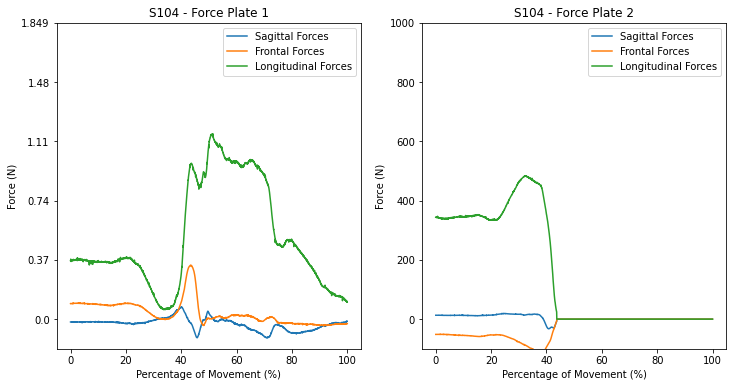

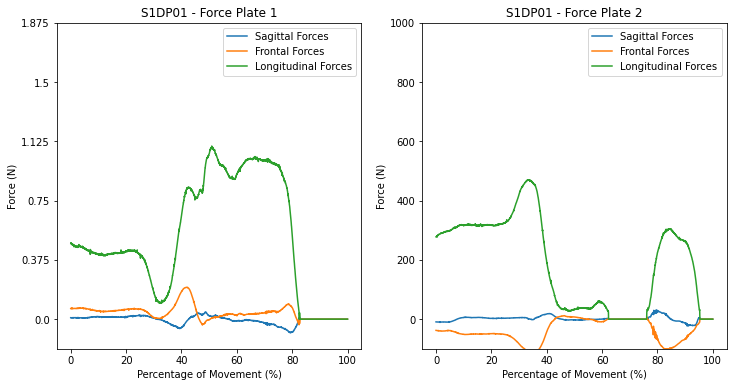

In [36]:
# Importing modules that are needed throughout the script
import pandas as pd
import numpy as np
import fontstyle
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Defining function that filters through the last names of the excel files and
# pulls the ones that have the letter you are searching for





# Retrieving the working directory that is going to be looped through
cwd = os.getcwd()

# Setting the directory to the current working directory so the file name can be concatenated
# to open each file individually
directory = os.getcwd()

# Creating a generator object that contains all of the excel files in the directory
# Asterisks is a wild card, so is saying take any file name that has .blahblah
# Could do sub wildcards i.e baseball.xlsx
files = Path(directory).glob('*.csv')

# Creating an empty list to append the results for each file, each part of list
# will be a data series
filesToCombine = {}
maxCols = {}

# Looping through the generator object and interact with each file
for file in files:
    # Print out file to make sure you are interacting with the correct file
    print(file)

    # Reads in the excel file as a dataframe
    #patientInfo = pd.read_excel(r'{filename}'.format(filename=file))
    columnCheck = pd.read_csv(r'{filename}'.format(filename=file), sep='\\t', skiprows= [0, 2, 3, 4], engine = 'python')
    # Takes the imported dataframe and isolates the last names into a data series
 
    filesToCombine[f'{file}'] = columnCheck
    #maxCols[f'{file}'] = len(columnCheck.columns)
    # Using the function that filters the last name based on the letter you want

    # Convert the list of filtered names into a data series


    # Add the new data series to the list
print(filesToCombine.keys())
print('_____' * 10)

def graphSegment(dataset, colX1, colZ1, colX2, colZ2, startRange, endRange, titleName, firstLine = 0, secondLine = 0, thirdLine = 0):
    # * The function plots the segment between two markers to visualize the segment's movement over time. 
    # * Due to the amount of data points, the function is created so you can splice the dataset to visualize
    # * the moments that you want to. The function is designed so that it only plots the segments that don't cross over
    # * the x-distance for the first point, that way the segments are easier to track over time. This function can work
    # * for any of the planes, it all depends on the columns that is inputted. The function takes in 7 inputs and returns
    # * a figure. Starting with dataset, the columnsare based off the inputted data and the data is expected to be a 
    # * dataframe created using pandas. The type of data contained within the dataframe should be either int or float. 
    # * colX1, colZ1 are the two columns that contain the X and Z direction data for the first desired marker 
    # * (i.e 'RSK1' for X 'RSK1.2 for Z) and colX2, colZ2 are the two columns that contain the X and Z direction data for
    # * the second desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. startRange should be where you want to begin mapping the segment and
    # * endRange should be where you want to stop mapping the segment. Both startRange and endRange should be inputted
    # * as integers. The output is a figure containing the segments over time and the plot should be saved to a
    # * variable when calling the function. 


    # Creating the figure and axes that is going to be plotted on. Initializing necessary variables

    
    fig, ax = plt.subplots()
    ax.set_xlabel('Displacement X-direction (m)')
    ax.set_ylabel('Displacement Z-direction (m)')

    # Manually cleaning up the imported columns by dropping the NaN values from the entire column
    dataset[colX1] = dataset[colX1].dropna()
    dataset[colZ1] = dataset[colZ1].dropna()
    dataset[colX2] = dataset[colX2].dropna()
    dataset[colZ2] = dataset[colZ2].dropna()
    #print(len(dataset[colX1]))
    
    # print(len(dataset[colX2]))
    
    # Looping through the desired portion of the segment's motion and plotting the line through each 
    # iteration of the loop. 
    count = 0
    for i in range(startRange,endRange):
        #Initializing the points in x-direction that are going to be checked and setting a pass condition
        if colX1 == 'Ball' or colZ1 == 'Ball.2':
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')
            ax.set_title(f'{titleName} + {colX1}')

        else:
            x1 = dataset.iloc[i][colX1]
            z1 = dataset.iloc[i][colZ1]

            x2 = dataset.iloc[i][colX2]
            z2 = dataset.iloc[i][colZ2]
        
            xPoints = [x1, x2]
            zPoints = [z1, z2]

            #Plotting the two points in space on the graph, should be for the X and Z direction
            ax.plot(xPoints, zPoints, 'bo', linestyle = '-')
            ax.set_title(f'{titleName} - {colX1[0:-1]}')

            # ! Plotting the lines for each graph depending on the ranges imported into the function
            # ! Check the first condition, tyring to do Ball breaks it because the values start at 0
            
            if i == firstLine - 1:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ1].dropna()), 3), round(max(dataset[startRange:endRange][colZ2].dropna()), 3)]
                print(verticalLineZ)#print(footStrike)
                #print(i)
                #print(f'{i} == {footStrike}')
                ax.plot(verticalLineX, verticalLineZ, 'go', linestyle = '-', label = 'Start of Movement')
                
            elif i == secondLine - 1:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ro', linestyle = '-', label = 'Ball Release')
            
        
            elif i == thirdLine - 1:
                verticalLineX = [x1, x1]
                verticalLineZ = [round(min(dataset[startRange:endRange][colZ2].dropna()), 3), round(max(dataset[startRange:endRange][colZ1].dropna()), 3)]
                ax.plot(verticalLineX, verticalLineZ, 'ko', linestyle = '-', label = 'Follow Through')
        
    ax.legend()

            
    # Returning the figure
    return fig

def visualizeForces(data5, titleName):
# ! Potentially set it up as 2 columns and 1 row so I can stack multiple people on top

    x = list(np.arange(0, len(data5.iloc[:]['FP1'])))
    for counter in range(len(x)):
        # x[counter] = x[counter]/1000
        x[counter] = (x[counter]/len(x)) * 100
 
    bodyWeight = data5.iloc[0]['FP1.2'] + data5.iloc[0]['FP2.2']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
    
    ax1.plot(x, data5.iloc[:]['FP1'], label = 'Sagittal Forces')
    ax1.plot(x, data5.iloc[:]['FP1.1'], label = 'Frontal Forces')
    ax1.plot(x, data5.iloc[:]['FP1.2'], label = 'Longitudinal Forces')

    ax2.plot(x, data5.iloc[:]['FP2'], label = 'Sagittal Forces')
    ax2.plot(x, data5.iloc[:]['FP2.1'], label = 'Frontal Forces')
    ax2.plot(x, data5.iloc[:]['FP2.2'], label = 'Longitudinal Forces')

    ax1.set_title(titleName + ' - Force Plate 1')
    ax1.set_xlabel('Percentage of Movement (%)')
    ax1.set_ylabel('Force (N)')

    ax1.set_ylim(-100, 1000)
    y = np.array([0, 200, 400, 600, 800, 1000])
    ticks = [round(0/bodyWeight, 3), round(200/bodyWeight, 3), round(400/bodyWeight, 3), round(600/bodyWeight, 3), 
    round(800/bodyWeight, 3), round(1000/bodyWeight, 3)]
    ax1.set_yticks(y, ticks)
    
    ax1.legend()

    ax2.set_title(titleName + ' - Force Plate 2')
    ax2.set_xlabel('Percentage of Movement (%)')
    ax2.set_ylabel('Force (N)')
    ax2.set_ylim(-100, 1000)
    ax2.legend()

    minForcePlate1 = min(data5.iloc[:]['FP1.2'])
    minForcePlate2 = min(data5.iloc[:]['FP2.2'])
    peakForcePlate1 = max(data5.iloc[:]['FP1.2'])
    peakForcePlate2 = max(data5.iloc[:]['FP2.2'])

    minMaxTiming1 = []
    minMaxTiming2 = []
    for counter in range(len(data5.iloc[:]['FP1.2'])):
        if data5.iloc[counter]['FP1.2'] == minForcePlate1 or data5.iloc[counter]['FP1.2'] == peakForcePlate1:
            minMaxTiming1.append(counter)

        if data5.iloc[counter]['FP2.2'] == minForcePlate2  and len(minMaxTiming2) < 2:
            minMaxTiming2.append(counter)
        elif data5.iloc[counter]['FP2.2'] == peakForcePlate2 and len(minMaxTiming2) < 2:
            minMaxTiming2.append(counter)
    

    timeToPeakFP1 = abs(minMaxTiming1[0] - minMaxTiming1[1])/1000
    timeToPeakFP2 = abs(minMaxTiming2[0] - minMaxTiming2[1])/1000
    forceProduction1 = (peakForcePlate1 - minForcePlate1)/timeToPeakFP1
    forceProduction2 = (peakForcePlate2 - minForcePlate2)/timeToPeakFP2


    return fig, peakForcePlate1, peakForcePlate2, forceProduction1, forceProduction2

def forceComparison(**kwargs):
    #The function brings in as many data sets as you want as keyword arguments
    figureList = []
    
    for titleName, dataset in kwargs.items():
        #Do something
        # Perform the initial report

        # Initializing and converting the event times to a frame to be used within the function for startRange and endRange  
        footStrike  = int((dataset.iloc[0]['Foot Strike']) * 200)
        ballRelease = int((dataset.iloc[0]['Event']) * 200)
        followThrough = int((dataset.iloc[0]['Foot Off']) * 200)

        # Creating a pandas series to find the number of rows. This lets me find the total frame length
        # and the total time of the trial
        
        df = dataset.iloc[:]['RBHD'].dropna()
        maxFrameLength = len(df)
        trialLength = maxFrameLength / 200

        # Running the function that visualizes the forces and gives peak force
        currentFigure, peakForce1, peakForce2, forceRateFP1, forceRateFP2 = visualizeForces(dataset, f'{titleName}')
        bodyWeight = dataset.iloc[0]['FP1.2'] + dataset.iloc[0]['FP2.2']
        print(peakForce1 / bodyWeight)
        print(peakForce2/bodyWeight)
        figureList.append(currentFigure)

        # Visualizing/Communicating the total frame length and the trial times
        print(fontstyle.apply('Trial Information', 'BOLD/BLACK/WHITE_BG'))
        print(f'The file for {titleName} is {maxFrameLength} frames long')
        print(f'The trial is {trialLength} seconds')
        print(" ")
        print(fontstyle.apply('Time of Events', 'BOLD/BLACK/WHITE_BG'))
        print(f'Start of Movement: {footStrike/200}s')
        print(f'Ball Release: {ballRelease/200}s')
        print(f'Follow Through: {followThrough/200}s')
        print(" ")
        print(fontstyle.apply('Force Data', 'BOLD/BLACK/WHITE_BG'))
        print(f'Lead Leg Peak Force: {peakForce1: .3f} N or {bodyWeight/peakForce1: .3f} times the body weight')
        print(f'Rear Leg Peak Force: {peakForce2: .3f} N or {bodyWeight/peakForce2: .3f} times the body weight')
        print(f'Force Production Rate (Force Plate 1): {forceRateFP1: .3f} N/s')
        print(f'Force Production Rate (Force Plate 2): {forceRateFP2: .3f} N/s')
        print('_____' * 10)
        
    return figureList

def segmentComparison(**kwargs):
    #The function brings in as many data sets as you want as keyword arguments
    figureList = []

    for titleName, dataset in kwargs.items():
        #Do something
        # Perform the initial report

        # Initializing and converting the event times to a frame to be used within the function for startRange and endRange  
        footStrike  = int((dataset.iloc[0]['Foot Strike']) * 200)
        ballRelease = int((dataset.iloc[0]['Event']) * 200)
        followThrough = int((dataset.iloc[0]['Foot Off']) * 200)
        print(f'{footStrike}!')
        # Creating a pandas series to find the number of rows. This lets me find the total frame length
        # and the total time of the trial
        
        df = dataset.iloc[:]['RBHD'].dropna()
        maxFrameLength = len(df)
        trialLength = maxFrameLength / 200

        # Visualizing/Communicating the total frame length and the trial times

        
        print(f'The file for {titleName} is {maxFrameLength} frames long')
        print(f'The trial is {trialLength} seconds')
        print(" ")
        print(f'Start of Movement: {footStrike/200}s')
        print(f'Ball Release: {ballRelease/200}s')
        print(f'Follow Through: {followThrough/200}s')
        
        print(f'{footStrike}!')
        print('_____' * 10)

        currentFigure = graphSegment(dataset, 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2', 0, footStrike, titleName, firstLine = footStrike, secondLine = ballRelease, thirdLine = followThrough)
        
        figureList.append(currentFigure)

    return figureList


forceFigures = forceComparison(S104 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'], 
S1DP01 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S2_DP_05_O.csv'])

# segmentFigures = segmentComparison(S104 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_04_M.csv'],
# S1DP02 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'], 
# S1DP13 = filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'])

# for figNum in plt.get_fignums():
#     print(type(figNum))
# plt.show(forceFigures[2])

###Checks
#print(filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'].iloc[0]['Foot Strike'])
#print(maxCols['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_01_WM.csv'])

# print(x)

c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_13_O.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S2_DP_05_O.csv
 
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_13_O.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S2_DP_05_O.csv
dict_keys(['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv', 'c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S2_DP_05_O.csv'])
__________________________________________________
Forearm: 79.80665207301425, Humerus: 187.3956762767009, Elbow: 107.58902420368665
Forearm: 79.77503362525609, Humerus: 187.42068606433978, Elbow: 107.64565243908369
Forearm: 79.79449214176553, Humerus: 187.0992543335301, Elbow: 107.30476219176457
Forearm: 79.80339857965649, Humerus: 187.1430391345265, Elbow: 107.33964055487002
Forearm: 79.80126782163997, Humerus: 187.0618298915214, Elbow: 107.26056206988143
Forearm: 79.88620908622926, Humerus: 187.01981317696584,

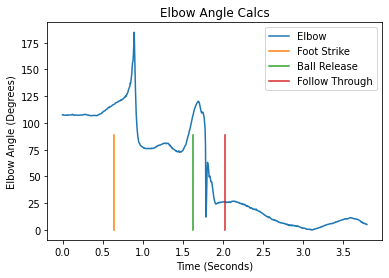

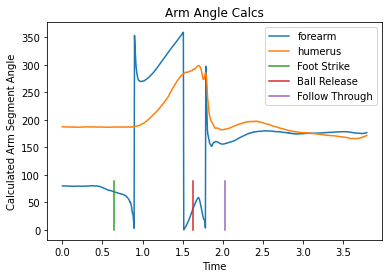

In [3]:
# Importing modules that are needed throughout the script
from pathlib import Path
import os
import pandas as pd
import numpy as np
import fontstyle
import matplotlib.pyplot as plt

# Retrieving the working directory that is going to be looped through
cwd = os.getcwd()

# Setting the directory to the current working directory so the file name can be concatenated
# to open each file individually
directory = os.getcwd()

# Creating a generator object that contains all of the excel files in the directory
# Asterisks is a wild card, so is saying take any file name that has .blahblah
# Could do sub wildcards i.e baseball.xlsx
files = Path(directory).glob('*.csv')

# Creating an empty dictionary to append the results for each file, each value of dictionary
# will be a data series
filesToCombine = {}

# Looping through the generator object and interact with each file
for file in files:

    # Print out file to make sure you are interacting with the correct file
    print(file)

    # Reads in the excel file as a dataframe
    columnCheck = pd.read_csv(r'{filename}'.format(
        filename=file), sep='\\t', skiprows=[0, 2, 3, 4], engine='python')

    # Takes the imported dataframe and isolates the last names into a data series
    filesToCombine[f'{file}'] = columnCheck

# Printing the keys for future reference when using the comparison function's **kwargs input
print(" ")
for key in filesToCombine.keys():
    print(key)
print(filesToCombine.keys())
print('_____' * 10)

def sagittalSegmentAngle(dataset, colX1, colZ1, colX2, colZ2):
    # * The function finds the segment angle within the sagittal plane (x direction) of the motion
    # * capture data. Calculates the segment length of interest by using the distance formula involving
    # * two marker points across the entire collection and calculates an angle by putting the segment length
    # * in reference to the ground to create a 90 degree triangle to find the missing angle.
    # * The function takes in 5 inputs and 3 outputs. Starting with dataset, the calculations
    # * are based off the inputted data and the data is expected to be a dataframe created using pandas.
    # * The type of data contained within the dataframe should be either int or float. colX1, colZ1 are
    # * the two columns that contain the X and Z direction data for the first desired marker (i.e 'RSK1' for X
    # * 'RSK1.2) and colX2, colZ2 are the two columns that contain the X and Z direction data for the second
    # * desired marker. The colX1, colZ1, colX2, colZ2 inputs must be strings aligned with the column names
    # * that are used within the passed dataframe. The outputs are lists containing float type objects
    # * for segment lengths, the calculated adjacent lengths and calculated angles using cosine.

    # Initializing variables
    segmentAngleList = []
    segmentLengthList = []
    adjacentLengthList = []

    datasetX1 = dataset[colX1].dropna()
    datasetZ1 = dataset[colZ1].dropna()
    datasetX2 = dataset[colX2].dropna()
    datasetZ2 = dataset[colZ2].dropna()
    # Running a for loop so that each value of x and z are synced up between the two desired
    # marker points in the cluster. Will creates lists for segment length, the calculated
    # adjacent length and the calculated angle. Uses .iloc from the pandas package to access
    # the dataframe and index properly. First [] is the row, second [] is the columns
    for value in range(len(datasetX1.iloc[:])):
        x1 = datasetX1.iloc[value]
        z1 = datasetZ1.iloc[value]

        x2 = datasetX2.iloc[value]
        z2 = datasetZ2.iloc[value]

        # Inputting variables into distance formula to find the length of the segment
        segmentLengthX = (x2 - x1)
        segmentLengthZ = (z2 - z1)
        #segmentLengthList.append(segmentLength)

        # Inputting variables into distance formula to calculate the adjacent length
        # in order to find the angle
        #adjacentLength = math.sqrt(((x2 - x1)**2) + ((z2 - z2)**2))
        #adjacentLengthList.append(adjacentLength)

        # Using cosine to calculate the angle for the entire segment
        calculatedArcTan = np.arctan2(segmentLengthX, segmentLengthZ)
        calculatedAngle = np.rad2deg(calculatedArcTan)
        
        if calculatedAngle <= 0:
            calculatedAngle += 360
            # print(calculatedAngle)
            segmentAngleList.append(calculatedAngle)
        else:
            #print(calculatedAngle)
            segmentAngleList.append(calculatedAngle)
        
        # segmentAngleList.append((calculatedAngle))
        # print(np.rad2deg(calculatedAngle))

        # A check to make sure that the function iterated all the way through
        # if value > 766:
        #     print("Distance has been calculated")

    return segmentAngleList, segmentLengthList, adjacentLengthList

forearmAngle, forearmLength, forearmAdjacentlength = sagittalSegmentAngle(filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'], 'RFR1', 'RFR1.2', 'RFR3', 'RFR3.2')
humerusAngle, humerusLength, humerusforearmAdjacentLength = sagittalSegmentAngle(filesToCombine['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv'], 'RUP1', 'RUP1.2', 'RUP3', 'RUP3.2')


footStrikeLine = []
for i in range(0, 90):
    footStrikeLine.append(0.64)

eventLine = []
for i in range(0, 90):
    eventLine.append(1.635)

footOffLine = []
for i in range(0, 90):
    footOffLine.append(2.03)

x = list(range(0, len(forearmAngle)))
for number in x:
    x[number] = number/200
y = list(range(0, 90))


#Calculating the elbow angle from our two segment angles
elbowAngle = []
for i in range(0, len(forearmAngle)):
    if forearmAngle[i] > 0 and forearmAngle[i] < 90 and humerusAngle[i] > 270:
        newHumerusAngle = (360 - humerusAngle[i])
        elbowAngle.append(forearmAngle[i] + newHumerusAngle)
    else:
        elbowAngle.append(abs(forearmAngle[i] - humerusAngle[i]))

# print(humerusAngle[140:150])
# print(forearmAngle[140:150])
# print(elbowAngle)
for i in range(len(elbowAngle)):
    print(f'Forearm: {forearmAngle[i]}, Humerus: {humerusAngle[i]}, Elbow: {elbowAngle[i]}')

print(max(elbowAngle))

fig1, ax = plt.subplots()
ax.plot(x, elbowAngle, label = 'Elbow')
ax.plot(footStrikeLine, y, label = 'Foot Strike')
ax.plot(eventLine, y, label = 'Ball Release')
ax.plot(footOffLine, y, label = 'Follow Through')
ax.set_title('Elbow Angle Calcs')
ax.set_ylabel('Elbow Angle (Degrees)')
ax.set_xlabel('Time (Seconds)')
ax.legend()

fig2, ax1 = plt.subplots()
ax1.plot(x, forearmAngle, label = 'forearm')
ax1.plot(x, humerusAngle, label = 'humerus')
ax1.plot(footStrikeLine, y, label = 'Foot Strike')
ax1.plot(eventLine, y, label = 'Ball Release')
ax1.plot(footOffLine, y, label = 'Follow Through')
ax1.set_title('Arm Angle Calcs')
ax1.set_ylabel('Calculated Arm Segment Angle')
ax1.set_xlabel('Time')
ax1.legend()

In [2]:
from tkinter import ttk
from tkinter import *


def calculate(*args):
    try:
        value = float(feet.get())
        meters.set(int(0.3048 * value * 10000.0 + 0.5)/10000.0)
    except ValueError:
        pass


# This is how tkinter is commonly loaded in
# ! Imports all of the modules within tkinter and
# ! specifically loads in the themed widgets submodule

# Setting up the main application window and giving
# the window a title
root = Tk()
root.title('Feet to Meters')

# Create a widget frame, root is the window we are working with
# and padding adds extra space around the inside of the frame
mainframe = ttk.Frame(root, padding="3 3 12 12")

# Place the newly created widget frame in the windows application
# by using grid. Columnconfigure and rowconfigure tells Tk to
# that the frame should expand to fill any extra space if the window
# is resized.
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

# Creating the entry widget. First we need to create the widget and
# then place the widget on screen. So ttk.Entry lets us specify its
# parent frame (so the widget frame in this case), these are the
# children widget. The Width value is how wide we want the entry,
# so the number of characters in this case. The textvariable is
# what is being entered by the entry widget. So whenever the entry
# changes, Tk will automatically update the global variable 'feet'.
# For python, the variables used for textvariables needs to be an
# instance of the StringVar class.
feet = StringVar()
feet_entry = ttk.Entry(mainframe, width=7, textvariable=feet)

# Now that we created the widget, we need to have it placed on screen.
# Tk doesn't know where you want the widgets placed relative to other
# widgets. So we use the grid to place the entry widget on the mainframe
# widget. Sticky option describes how the widget should line up within
# the grid cell, using compass directions. So w (west) means to anchor the
# widget to the left side of the cell.
feet_entry.grid(column=2, row=1, stick=(W, E))

# Creating the widget for the resulting number of meters we calculate
meters = StringVar()
ttk.Label(mainframe, textvariable=meters).grid(column=2, row=2, sticky=(W, E))

# Creating a widget for the calculate button
ttk.Button(mainframe, text="Calculate", command=calculate).grid(
    column=3, row=3, sticky=W)

# Creating 3 static labels to make it clear how to use the application.
# Need to create and then place each label in the appropriate cell in the grid.
ttk.Label(mainframe, text="feet").grid(column=3, row=1, sticky=W)
ttk.Label(mainframe, text="is equivalent to").grid(column=1, row=2, sticky=E)
ttk.Label(mainframe, text="meters").grid(column=3, row=2, sticky=W)

# Goes through all of the widgets contained in the content frame and adds
# padding around each.
for child in mainframe.winfo_children():
    child.grid_configure(padx=5, pady=5)

# This part tells Tk to put focus on our entry widget. That way, the cursor will
# start in that field, so users don't have to click on it before starting to type
feet_entry.focus()

# This part tells Tk that if a user presses the Return/Enter key, it should call our
# calculate routine (the same as if they pressed the calculate button)
root.bind("<Return>", calculate)

# Starting the event loop
root.mainloop()


c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S1_DP_13_O.csv
c:\Users\Isiah Turner\OneDrive\Documents\Final project 2022\S2_DP_05_O.csv
dict_keys(['c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S1_DP_13_O.csv', 'c:\\Users\\Isiah Turner\\OneDrive\\Documents\\Final project 2022\\S2_DP_05_O.csv'])
__________________________________________________
Trial Information
The file for S1 is 708 frames long
The trial is 3.54 seconds
 
Time of Events
Start of Movement: 0.515s
Ball Release: 1.61s
Follow Through: 1.895s
 
Force Data
Lead Leg Peak Force:  583.851 N or  0.913 times the body weight
Rear Leg Peak Force:  469.751 N or  1.135 times the body weight
Force Production Rate (Force Plate 1):  521.295 N/s
Force Production Rate (Force Plate 2):  460.540 N/s
__________________________________________________
Trial Information
The file for S2 is 708 frames long
The trial is 3.54 seconds
 
Time of Events
Start of Movement: 0.515s
Ball Release: 1.61s
Follow Through: 

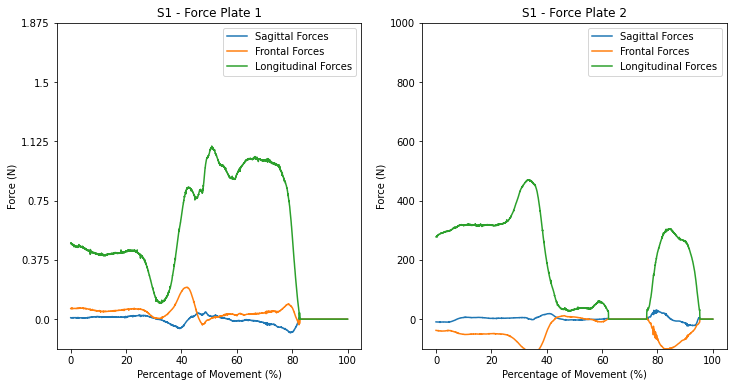

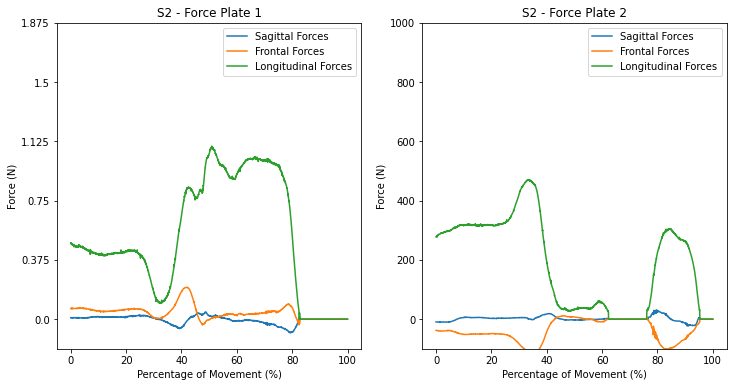

In [5]:
# Importing modules that are needed throughout the script
from tkinter import *
from tkinter import ttk
from pathlib import Path
import os
import pandas as pd
import numpy as np
import fontstyle
import matplotlib.pyplot as plt
import cv2




# Retrieving the working directory that is going to be looped through
cwd = os.getcwd()

# Setting the directory to the current working directory so the file name can be concatenated
# to open each file individually
directory = os.getcwd()

# Creating a generator object that contains all of the excel files in the directory
# Asterisks is a wild card, so is saying take any file name that has .blahblah
# Could do sub wildcards i.e baseball.xlsx
files = Path(directory).glob('*.csv')

# Creating an empty list to append the results for each file, each part of list
# will be a data series
filesToCombine = {}
maxCols = {}

# Looping through the generator object and interact with each file
for file in files:
    # Print out file to make sure you are interacting with the correct file
    print(file)

    # Reads in the excel file as a dataframe
    #patientInfo = pd.read_excel(r'{filename}'.format(filename=file))
    columnCheck = pd.read_csv(r'{filename}'.format(filename=file), sep='\\t', skiprows= [0, 2, 3, 4], engine = 'python')
    # Takes the imported dataframe and isolates the last names into a data series
 
    filesToCombine[f'{file}'] = columnCheck
    #maxCols[f'{file}'] = len(columnCheck.columns)
    # Using the function that filters the last name based on the letter you want

    # Convert the list of filtered names into a data series


    # Add the new data series to the list
print(filesToCombine.keys())
print('_____' * 10)
imageList = []
def visualizeForces(data5, titleName):
# ! Potentially set it up as 2 columns and 1 row so I can stack multiple people on top

    x = list(np.arange(0, len(data5.iloc[:]['FP1'])))
    for counter in range(len(x)):
        # x[counter] = x[counter]/1000
        x[counter] = (x[counter]/len(x)) * 100
 
    bodyWeight = data5.iloc[0]['FP1.2'] + data5.iloc[0]['FP2.2']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
    
    ax1.plot(x, data5.iloc[:]['FP1'], label = 'Sagittal Forces')
    ax1.plot(x, data5.iloc[:]['FP1.1'], label = 'Frontal Forces')
    ax1.plot(x, data5.iloc[:]['FP1.2'], label = 'Longitudinal Forces')

    ax2.plot(x, data5.iloc[:]['FP2'], label = 'Sagittal Forces')
    ax2.plot(x, data5.iloc[:]['FP2.1'], label = 'Frontal Forces')
    ax2.plot(x, data5.iloc[:]['FP2.2'], label = 'Longitudinal Forces')

    ax1.set_title(titleName + ' - Force Plate 1')
    ax1.set_xlabel('Percentage of Movement (%)')
    ax1.set_ylabel('Force (N)')

    ax1.set_ylim(-100, 1000)
    y = np.array([0, 200, 400, 600, 800, 1000])
    ticks = [round(0/bodyWeight, 3), round(200/bodyWeight, 3), round(400/bodyWeight, 3), round(600/bodyWeight, 3), 
    round(800/bodyWeight, 3), round(1000/bodyWeight, 3)]
    ax1.set_yticks(y, ticks)
    
    ax1.legend()

    ax2.set_title(titleName + ' - Force Plate 2')
    ax2.set_xlabel('Percentage of Movement (%)')
    ax2.set_ylabel('Force (N)')
    ax2.set_ylim(-100, 1000)
    ax2.legend()

    minForcePlate1 = min(data5.iloc[:]['FP1.2'])
    minForcePlate2 = min(data5.iloc[:]['FP2.2'])
    peakForcePlate1 = max(data5.iloc[:]['FP1.2'])
    peakForcePlate2 = max(data5.iloc[:]['FP2.2'])

    minMaxTiming1 = []
    minMaxTiming2 = []
    for counter in range(len(data5.iloc[:]['FP1.2'])):
        if data5.iloc[counter]['FP1.2'] == minForcePlate1 or data5.iloc[counter]['FP1.2'] == peakForcePlate1:
            minMaxTiming1.append(counter)

        if data5.iloc[counter]['FP2.2'] == minForcePlate2  and len(minMaxTiming2) < 2:
            minMaxTiming2.append(counter)
        elif data5.iloc[counter]['FP2.2'] == peakForcePlate2 and len(minMaxTiming2) < 2:
            minMaxTiming2.append(counter)
    

    timeToPeakFP1 = abs(minMaxTiming1[0] - minMaxTiming1[1])/1000
    timeToPeakFP2 = abs(minMaxTiming2[0] - minMaxTiming2[1])/1000
    forceProduction1 = (peakForcePlate1 - minForcePlate1)/timeToPeakFP1
    forceProduction2 = (peakForcePlate2 - minForcePlate2)/timeToPeakFP2


    return fig, peakForcePlate1, peakForcePlate2, forceProduction1, forceProduction2

def forceComparison(**kwargs):
    #The function brings in as many data sets as you want as keyword arguments
    figureList = []
    
    for titleName, dataset in kwargs.items():
        #Do something
        # Perform the initial report

        # Initializing and converting the event times to a frame to be used within the function for startRange and endRange  
        footStrike  = int((dataset.iloc[0]['Foot Strike']) * 200)
        ballRelease = int((dataset.iloc[0]['Event']) * 200)
        followThrough = int((dataset.iloc[0]['Foot Off']) * 200)

        # Creating a pandas series to find the number of rows. This lets me find the total frame length
        # and the total time of the trial
        
        df = dataset.iloc[:]['RBHD'].dropna()
        maxFrameLength = len(df)
        trialLength = maxFrameLength / 200

        # Running the function that visualizes the forces and gives peak force
        currentFigure, peakForce1, peakForce2, forceRateFP1, forceRateFP2 = visualizeForces(dataset, f'{titleName}')
        bodyWeight = dataset.iloc[0]['FP1.2'] + dataset.iloc[0]['FP2.2']
        # print(peakForce1 / bodyWeight)
        # print(peakForce2/bodyWeight)
        figureList.append(currentFigure)

        # Visualizing/Communicating the total frame length and the trial times
        print(fontstyle.apply('Trial Information', 'BOLD/BLACK/WHITE_BG'))
        print(f'The file for {titleName} is {maxFrameLength} frames long')
        print(f'The trial is {trialLength} seconds')
        print(" ")
        print(fontstyle.apply('Time of Events', 'BOLD/BLACK/WHITE_BG'))
        print(f'Start of Movement: {footStrike/200}s')
        print(f'Ball Release: {ballRelease/200}s')
        print(f'Follow Through: {followThrough/200}s')
        print(" ")
        print(fontstyle.apply('Force Data', 'BOLD/BLACK/WHITE_BG'))
        print(f'Lead Leg Peak Force: {peakForce1: .3f} N or {bodyWeight/peakForce1: .3f} times the body weight')
        print(f'Rear Leg Peak Force: {peakForce2: .3f} N or {bodyWeight/peakForce2: .3f} times the body weight')
        print(f'Force Production Rate (Force Plate 1): {forceRateFP1: .3f} N/s')
        print(f'Force Production Rate (Force Plate 2): {forceRateFP2: .3f} N/s')
        print('_____' * 10)
        
    return figureList

def calculate(*args):
    try:
        forceComparison(S1 = filesToCombine[filename1.get()], S2 = filesToCombine[filename2.get()])
        ttk.Label(mainframe, text = 'SUCCESS').grid(column = 3, row = 1)
        # ttk.Entry(mainframe, text = '')
        plt.show()
    except ValueError:
        print('Error')
        pass

# Setting up the main application window and giving the window a title
rootWindow = Tk()
rootWindow.title('Force Comparison')

# Create a widget frame, root is the window we are working with
# and padding adds extra space around the inside of the frame
mainframe = ttk.Frame(rootWindow, padding="3 3 12 12")

# Place the newly created widget frame in the windows application
# by using grid. Columnconfigure and rowconfigure tells Tk to
# that the frame should expand to fill any extra space if the window
# is resized.
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
rootWindow.columnconfigure(0, weight=1)
rootWindow.rowconfigure(0, weight=1)

# Creating the entry widget. First we need to create the widget and
# then place the widget on screen. So ttk.Entry lets us specify its
# parent frame (so the widget frame in this case), these are the
# children widget. The Width value is how wide we want the entry,
# so the number of characters in this case. The textvariable is
# what is being entered by the entry widget. So whenever the entry
# changes, Tk will automatically update the global variable 'feet'.
# For python, the variables used for textvariables needs to be an
# instance of the StringVar class.
filename1 = StringVar()
filename1Entry = ttk.Entry(mainframe, width=50, textvariable=filename1)


filename2 = StringVar()
filename2Entry = ttk.Entry(mainframe, width = 50, textvariable = filename2)

# Placing the entries onto the GUI stacked on top of each other
filename1Entry.grid(column=1, row=1, stick=(W, E))
filename2Entry.grid(column=1, row=2, stick=(W, E))

# Adding spacing and a status bar
ttk.Label(mainframe, text= '').grid(column = 1, row = 3)
ttk.Label(mainframe, text = 'STATUS:').grid(column = 2, row = 1, stick = (W, E))

# Creating the button that creates the calculations
ttk.Button(mainframe, text="Calculate", command=calculate).grid(
    column=1, row=4, sticky=W)
  

# Goes through all of the widgets contained in the content frame and adds
# padding around each.
for child in mainframe.winfo_children():
    child.grid_configure(padx=5, pady=5)

# This part tells Tk to put focus on our entry widget. That way, the cursor will
# start in that field, so users don't have to click on it before starting to type
filename1Entry.focus()

# This part tells Tk that if a user presses the Return/Enter key, it should call our
# calculate routine (the same as if they pressed the calculate button)
rootWindow.bind("<Return>", calculate)

# Starting the event loop
rootWindow.mainloop()

# OVERALL NEED TO CHANGE:
# 1. How to handle the imported data, dictionary makes it less flexible/automated at the moment
# 2. Need to adjust the visualizingForces function to call on the datasets more effectively
# 3. Definitely need to fix the interaction with handling figures/images, will help with
# GUI work. Maybe display then close based off loop count, etc
# 4. Export the report instead of printing to the terminal, will make it easier to visualize 
# 5. When presenting the data on graph, plan out the subplots() better and potentially wait 
# to display them until all of the figures are created. 
# 6. Could also store the data in a new file every time it is generated instead and then work
# from there. 
# 7. Separate a lot of the work into more functions potentially. 